In [47]:
# %load_ext autoreload
# %autoreload 2

import sys, os
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '.')))

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle, datetime

from analyzer import Analyzer

In [23]:
PATHNAME = ["/home/hengji/Documents/hydra/videos/Control-EGCaMP_exp1_a1_30x10fps_5%.avi",
            "/home/hengji/Documents/hydra/videos/EGCaMP_ctrl_30mins_40x_10fps_mv1.avi",
            "/home/hengji/Documents/hydra/videos/Control-EGCaMP_exp1_a2_25x10fps_30mins.avi",
            "/home/hengji/Documents/hydra/videos/EndoRCaMP_ctrl_30mins_35x_10fps_35%intensity_mv3.avi",
            "/home/hengji/Documents/hydra/videos/EndoRCaMP_ctrl_30mins_35x_10fps_79%intensity_mv6.avi", 
            "/home/hengji/Documents/hydra/videos/Pre_Bisect_40x_4fps_ex4.avi",
            "/home/hengji/Documents/hydra/videos/Copy of NGCaMP6_50X_20fps_M1.avi"]
FPS = [10, 10, 10, 10, 10, 4, 20]

In [54]:
# Create an analyzer
# anlzr = Analyzer()

# Or... Import a saved one
anlzr = pickle.load(open("./objects/2020-04-01-23-24.txt", "rb"))

In [50]:
# Add video to the analyzer
PATHNAME = ["/home/hengji/Documents/hydra/videos/EndoRCaMP_ctrl_30mins_35x_10fps_79%intensity_mv6.avi"]
FPS = [10]
anlzr.add_videos(pathname=PATHNAME, fps=FPS)

In [51]:
# Check the added videos
anlzr.videos()

EndoRCaMP_ctrl_30mins_35x_10fps_79%intensity_mv6.avi


In [52]:
anlzr.find_midline(name="EndoRCaMP_ctrl_30mins_35x_10fps_79%intensity_mv6.avi")

100%|██████████| 16278/16278 [01:25<00:00, 189.37it/s]


<Figure size 1440x1440 with 0 Axes>

In [ ]:
anlzr.plot_midline_len()

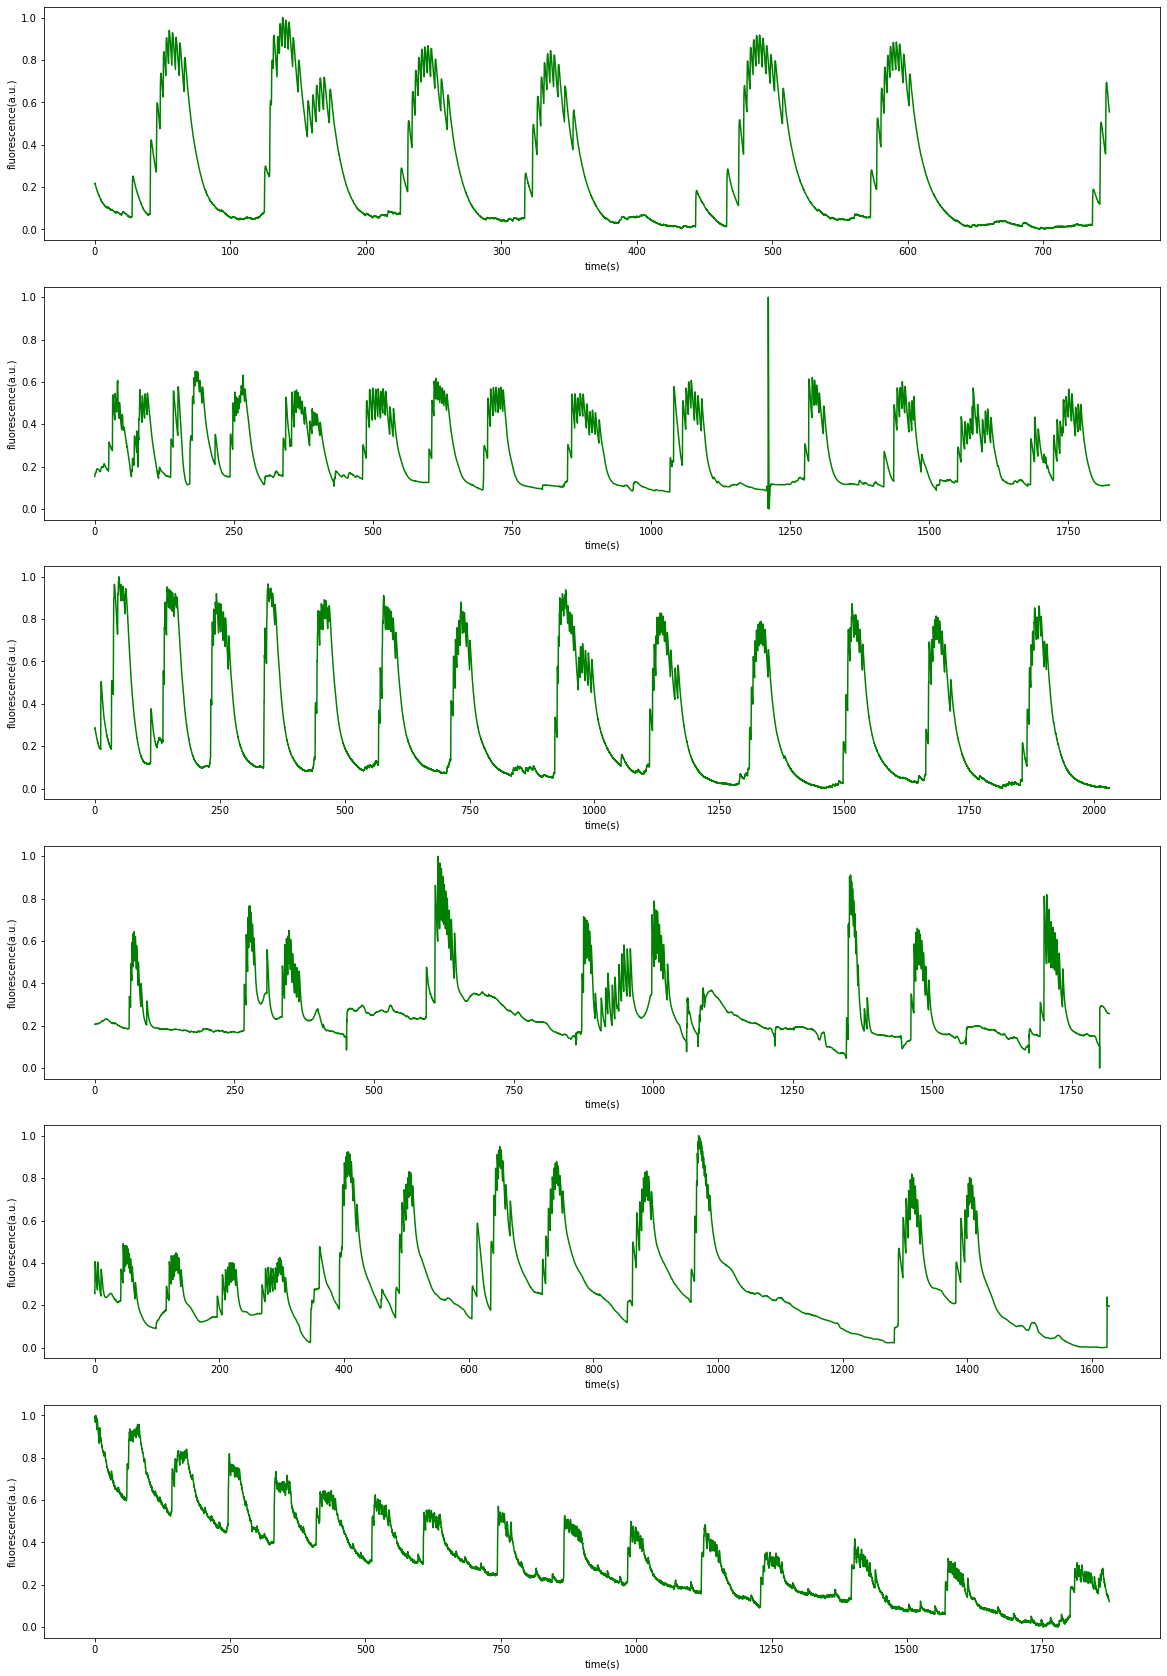

In [55]:
# Trace the fluorescences
anlzr.trace_fluos(normalized=True, 
                  display=False, 
                  plot=True)

In [ ]:
# Delete video
anlzr.delete_video("Copy of NGCaMP6_50X_20fps_M1.avi")
anlzr.videos()

In [28]:
# Find peaks
anlzr.find_peaks(plot=False,
                height=0.1,
                wlen=100,
                prominence=0.025,
                min_cb_interval=10)

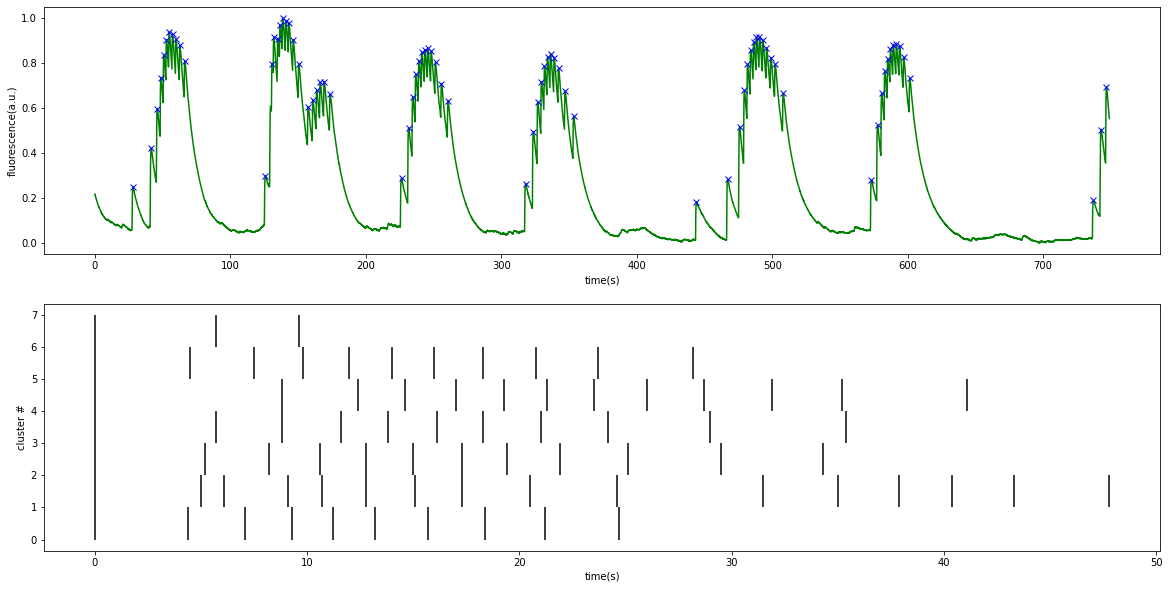

In [30]:
# Find peaks of a specific video
anlzr.find_peaks(name="Control-EGCaMP_exp1_a1_30x10fps_5%.avi",
                plot=True,
                height=0.1,
                wlen=100,
                prominence=0.025,
                min_cb_interval=10)

In [67]:
anlzr._videos["Control-EGCaMP_exp1_a1_30x10fps_5%.avi"].peak_clusters()

[[0, 44, 71, 93, 112, 132, 157, 184, 212, 247],
 [0, 50, 61, 91, 107, 128, 151, 173, 205, 246, 315, 350, 379, 404, 433, 478],
 [0, 52, 82, 106, 128, 150, 173, 194, 219, 251, 295, 343],
 [0, 57, 88, 116, 138, 161, 183, 210, 242, 290, 354],
 [0, 88, 124, 146, 170, 193, 213, 235, 260, 287, 319, 352, 411],
 [0, 45, 75, 98, 120, 140, 160, 183, 208, 237, 282],
 [0, 57, 96]]

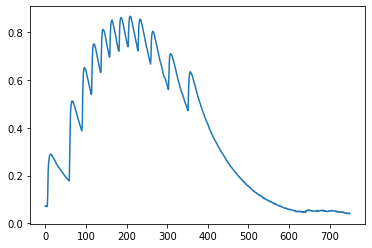

In [63]:
plt.plot(anlzr._videos["Control-EGCaMP_exp1_a1_30x10fps_5%.avi"].fluo_trace()[2250:3000])

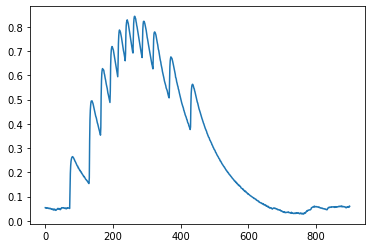

In [66]:
plt.plot(anlzr._videos["Control-EGCaMP_exp1_a1_30x10fps_5%.avi"].fluo_trace()[3100:4000])

#1b11be 0
#8925d5 7
#2aa7f1 23
#36e65c 36
#2d3ee5 47
#7809ff 60


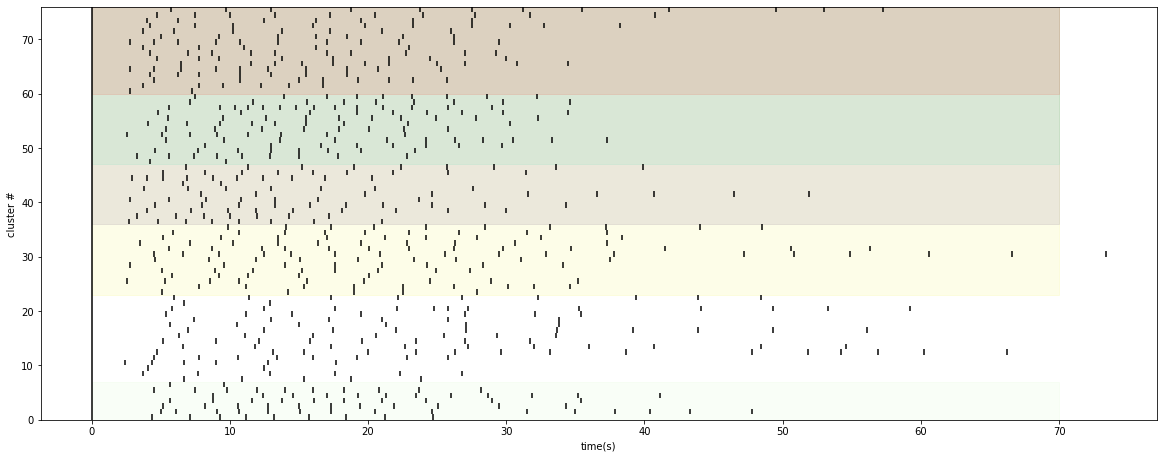

In [113]:
# Plot all spike trains
anlzr.plot_spike_trains()

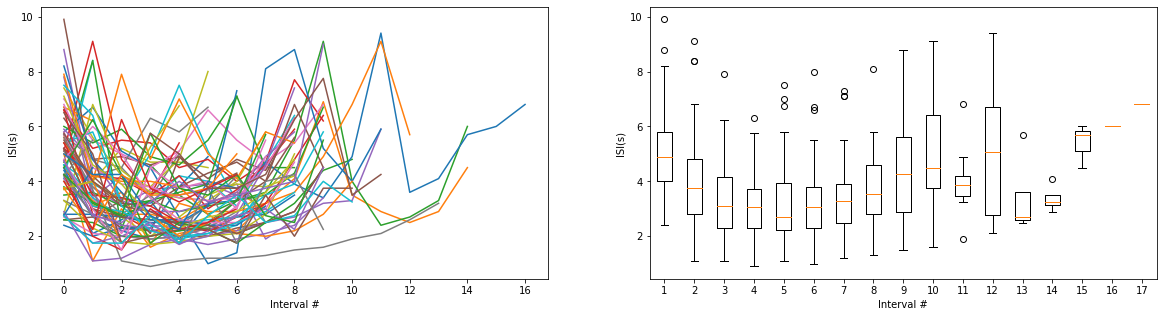

In [18]:
# Plot the statistics of ISI
anlzr.stat_isi()

In [19]:
# Save anlzr
filename = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M")
filehandler = open("./objects/" + filename + ".txt", 'wb') 
pickle.dump(anlzr, filehandler)